In [1]:
import pandas as pd
from catboost import CatBoostClassifier, Pool

from modeling import simple_split

In [2]:
train_df = pd.read_csv('train_df.csv')

### 1.1 Modeling

In [3]:
target_df = pd.read_csv('5_sec_target.csv')

In [4]:
(X_train, Y_train), (X_test, Y_test) = simple_split(train_df, target_df, fraction=0.8)
(X_train, Y_train), (X_val, Y_val) = simple_split(X_train, Y_train, fraction=0.8)
X_train.shape, X_val.shape, X_test.shape

((443948, 42), (110987, 42), (138734, 42))

In [5]:
print("Train positive fraction:", Y_train.mean())
print("Validation positive fraction:", Y_val.mean()) 
print("Test positive fraction:", Y_test.mean())

Train positive fraction: 5_sec    0.799391
dtype: float64
Validation positive fraction: 5_sec    0.752512
dtype: float64
Test positive fraction: 5_sec    0.744035
dtype: float64


In [6]:
train_pool = Pool(data=X_train, label=Y_train)
val_pool = Pool(data=X_val, label=Y_val)

In [7]:
model_d3 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

model_d4 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=4,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

model_d5 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=5,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

In [8]:
model_d3.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500,
)

0:	test: 0.5042835	best: 0.5042835 (0)	total: 117ms	remaining: 9m 46s
1:	test: 0.6051638	best: 0.6051638 (1)	total: 153ms	remaining: 6m 22s
2:	test: 0.6029218	best: 0.6051638 (1)	total: 176ms	remaining: 4m 53s
3:	test: 0.6140973	best: 0.6140973 (3)	total: 198ms	remaining: 4m 7s
4:	test: 0.6143105	best: 0.6143105 (4)	total: 219ms	remaining: 3m 38s
5:	test: 0.6206632	best: 0.6206632 (5)	total: 242ms	remaining: 3m 21s
6:	test: 0.6437144	best: 0.6437144 (6)	total: 264ms	remaining: 3m 7s
7:	test: 0.6490918	best: 0.6490918 (7)	total: 283ms	remaining: 2m 56s
8:	test: 0.6481153	best: 0.6490918 (7)	total: 309ms	remaining: 2m 51s
9:	test: 0.6482389	best: 0.6490918 (7)	total: 340ms	remaining: 2m 49s
10:	test: 0.6499000	best: 0.6499000 (10)	total: 362ms	remaining: 2m 44s
11:	test: 0.6512442	best: 0.6512442 (11)	total: 387ms	remaining: 2m 40s
12:	test: 0.6512651	best: 0.6512651 (12)	total: 408ms	remaining: 2m 36s
13:	test: 0.6506322	best: 0.6512651 (12)	total: 438ms	remaining: 2m 35s
14:	test: 0.65

In [9]:
model_d4.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

Learning rate set to 0.070917
0:	test: 0.5036963	best: 0.5036963 (0)	total: 34.2ms	remaining: 2m 51s
1:	test: 0.5133464	best: 0.5133464 (1)	total: 66.1ms	remaining: 2m 45s
2:	test: 0.6244686	best: 0.6244686 (2)	total: 95ms	remaining: 2m 38s
3:	test: 0.6244490	best: 0.6244686 (2)	total: 119ms	remaining: 2m 28s
4:	test: 0.6467373	best: 0.6467373 (4)	total: 149ms	remaining: 2m 28s
5:	test: 0.6467689	best: 0.6467689 (5)	total: 184ms	remaining: 2m 33s
6:	test: 0.6472888	best: 0.6472888 (6)	total: 212ms	remaining: 2m 30s
7:	test: 0.6500887	best: 0.6500887 (7)	total: 237ms	remaining: 2m 27s
8:	test: 0.6521195	best: 0.6521195 (8)	total: 264ms	remaining: 2m 26s
9:	test: 0.6626501	best: 0.6626501 (9)	total: 288ms	remaining: 2m 23s
10:	test: 0.6632373	best: 0.6632373 (10)	total: 318ms	remaining: 2m 24s
11:	test: 0.6646476	best: 0.6646476 (11)	total: 342ms	remaining: 2m 22s
12:	test: 0.6658629	best: 0.6658629 (12)	total: 368ms	remaining: 2m 21s
13:	test: 0.6663119	best: 0.6663119 (13)	total: 394ms

In [10]:
model_d5.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

0:	test: 0.5149720	best: 0.5149720 (0)	total: 33.9ms	remaining: 2m 49s
1:	test: 0.5409314	best: 0.5409314 (1)	total: 64ms	remaining: 2m 40s
2:	test: 0.5507054	best: 0.5507054 (2)	total: 92ms	remaining: 2m 33s
3:	test: 0.6058577	best: 0.6058577 (3)	total: 117ms	remaining: 2m 26s
4:	test: 0.6161857	best: 0.6161857 (4)	total: 141ms	remaining: 2m 20s
5:	test: 0.6486076	best: 0.6486076 (5)	total: 164ms	remaining: 2m 16s
6:	test: 0.6528985	best: 0.6528985 (6)	total: 187ms	remaining: 2m 13s
7:	test: 0.6583302	best: 0.6583302 (7)	total: 213ms	remaining: 2m 12s
8:	test: 0.6628611	best: 0.6628611 (8)	total: 245ms	remaining: 2m 15s
9:	test: 0.6633647	best: 0.6633647 (9)	total: 270ms	remaining: 2m 14s
10:	test: 0.6634692	best: 0.6634692 (10)	total: 293ms	remaining: 2m 13s
11:	test: 0.6637583	best: 0.6637583 (11)	total: 318ms	remaining: 2m 12s
12:	test: 0.6628604	best: 0.6637583 (11)	total: 342ms	remaining: 2m 11s
13:	test: 0.6633090	best: 0.6637583 (11)	total: 363ms	remaining: 2m 9s
14:	test: 0.66

In [11]:
not_active_X = X_test[~X_test.active_area].reset_index(drop='index')
not_active_Y= Y_test[~X_test.active_area].reset_index(drop='index')
not_active_pool = Pool(data=not_active_X, label=not_active_Y)
not_active_Y.value_counts()

5_sec
True     1638
False    1619
Name: count, dtype: int64

In [12]:
passive_X = X_test[X_test.passive_area].reset_index(drop='index')
passive_Y = Y_test[X_test.passive_area].reset_index(drop='index')
passive_pool = Pool(data=passive_X, label=passive_Y)
passive_Y.value_counts()

5_sec
True     1592
False     650
Name: count, dtype: int64

In [13]:
active_X = X_test[X_test.active_area].reset_index(drop='index')
active_Y = Y_test[X_test.active_area].reset_index(drop='index')
active_pool = Pool(data=active_X, label=active_Y)
active_Y.value_counts()

5_sec
True     101585
False     33892
Name: count, dtype: int64

In [14]:
from metrics import calculate_metrics

AUC: 0.9114
AP: 0.8702
Precision: 0.7931
Recall: 0.9267


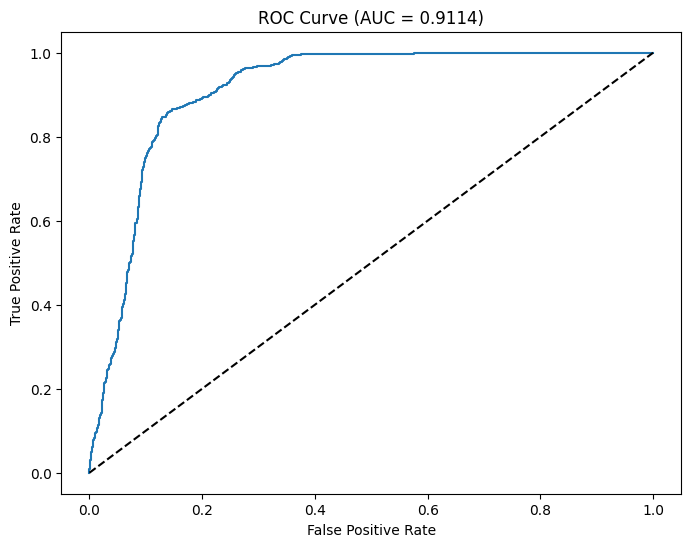

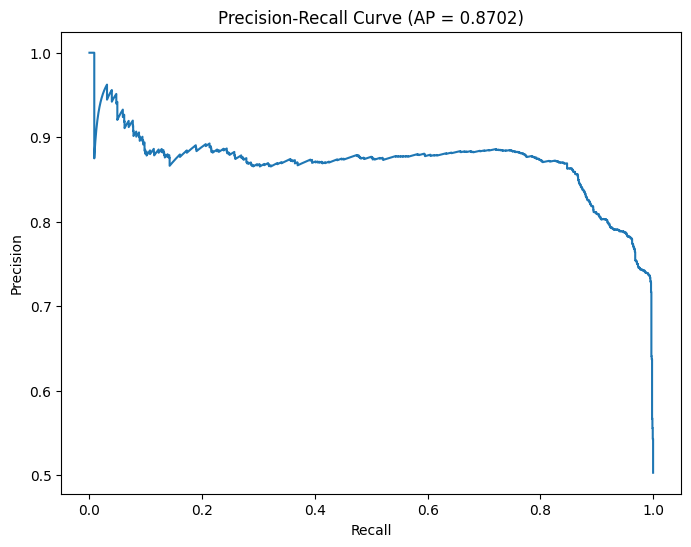

In [15]:
calculate_metrics(model_d5, not_active_pool, 'metrics/modeling_5_sec_momentum/non_active')

AUC: 0.8073
AP: 0.8758
Precision: 0.8037
Recall: 0.9617


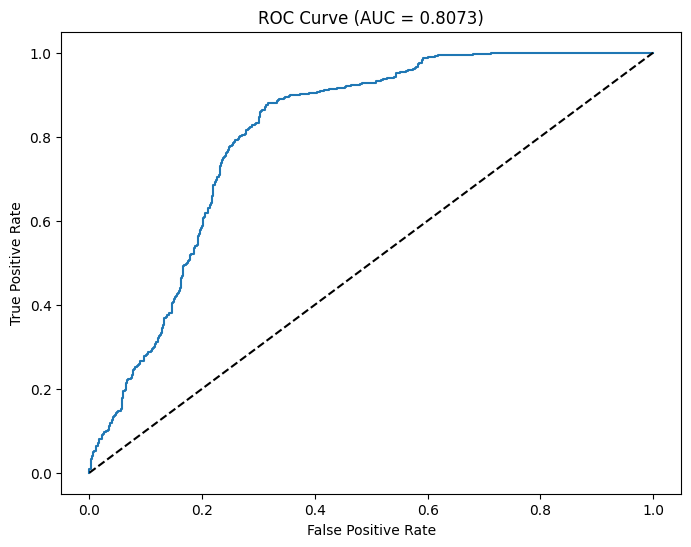

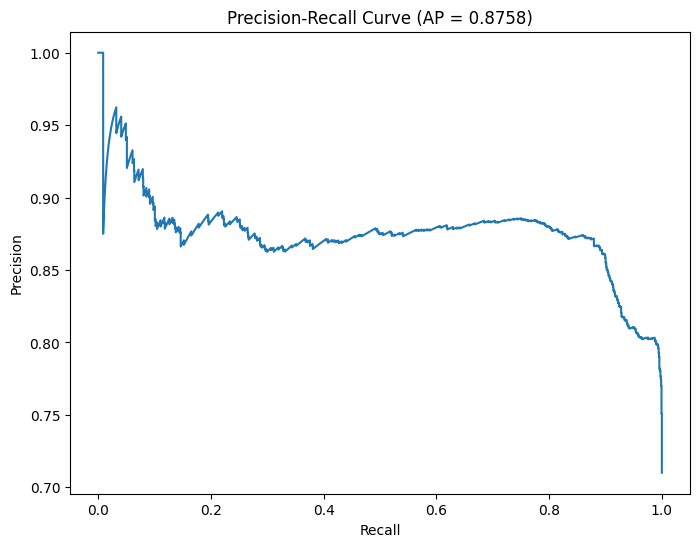

In [16]:
calculate_metrics(model_d5, passive_pool, 'metrics/modeling_5_sec_momentum/passive')

AUC: 0.7026
AP: 0.8584
Precision: 0.7528
Recall: 0.9964


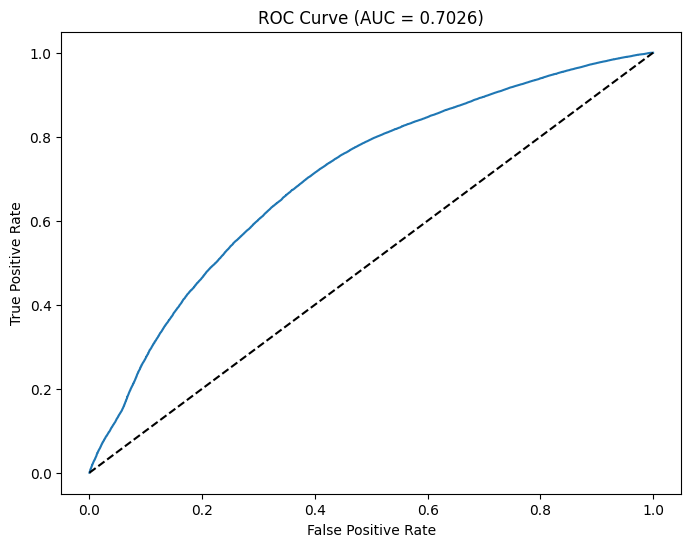

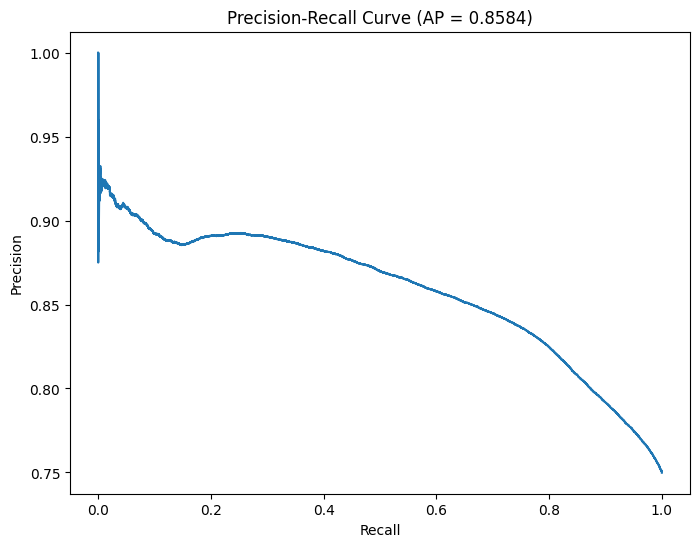

In [17]:
calculate_metrics(model_d5, active_pool, 'metrics/modeling_5_sec_momentum/active')